In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df2=pd.read_csv("/content/data_cleaned.csv", parse_dates=['Order Date', 'Ship Date'] )

In [3]:
df2.head()

,Row ID,Order ID,Customer ID,Ship Mode,Order Date,Ship Date,period,Season,year,month,...,City,Segment,Sub-Category,Product ID,Product Name,Discount,Sales,Quantity,unit_value,Profit
0,4,US-2015-108966,SO-20335,Standard Class,2015-10-11,2015-10-18,811 days,Fall,2015,10,...,Fort Lauderdale,Consumer,Tables,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,0.45,957.5775,5,191.5155,-383.0310
1,11,CA-2014-115812,BH-11710,Standard Class,2014-06-09,2014-06-14,1300 days,Summer,2014,6,...,Los Angeles,Consumer,Tables,FUR-TA-10001539,Chromcraft Rectangular Conference Tables,0.20,1706.1840,9,189.5760,85.3092
2,25,CA-2015-106320,EB-13870,Standard Class,2015-09-25,2015-09-30,827 days,Fall,2015,9,...,Orem,Consumer,Tables,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,0.00,1044.6300,3,348.2100,240.2649
3,28,US-2015-150630,TB-21520,Standard Class,2015-09-17,2015-09-21,835 days,Fall,2015,9,...,Philadelphia,Consumer,Bookcases,FUR-BO-10004834,"Riverside Palais Royal Lawyers Bookcase, Royal...",0.50,3083.4300,7,440.4900,-1665.0522
4,30,US-2015-150630,TB-21520,Standard Class,2015-09-17,2015-09-21,835 days,Fall,2015,9,...,Philadelphia,Consumer,Furnishings,FUR-FU-10004848,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",0.20,124.2000,3,41.4000,15.5250


##2.- ¿Existen diferencias significativas en la cantidad de productos vendidos
##('Quantity') entre las diferentes categorías de productos?

In [4]:
ventas_categorias=df2.groupby('Sub-Category')[ 'Quantity'].sum().sort_values(ascending=False).reset_index()
ventas_categorias

,Sub-Category,Quantity
0,Furnishings,2775
1,Chairs,1887
2,Tables,1031
3,Bookcases,655


In [5]:
print(ventas_categorias.describe())

          Quantity
count     4.000000
mean   1587.000000
std     945.005115
min     655.000000
25%     937.000000
50%    1459.000000
75%    2109.000000
max    2775.000000


<ipython-input-6-16ced0fd3b0e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_categorias, x='Sub-Category', y='Quantity', palette='viridis')


Text(0.5, 1.0, 'Cantidad de Productos por Categoría')

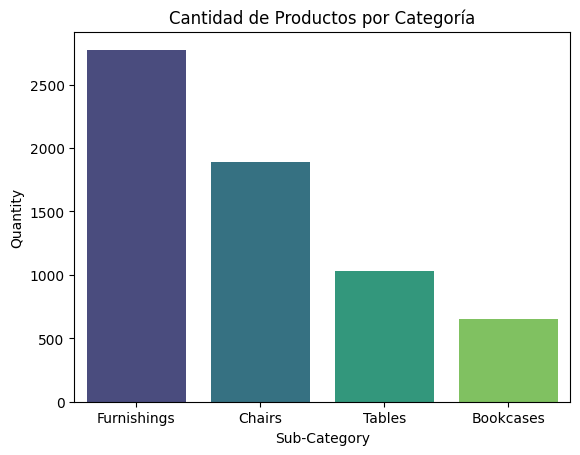

In [6]:
sns.barplot(data=ventas_categorias, x='Sub-Category', y='Quantity', palette='viridis')
plt.title('Cantidad de Productos por Categoría')

#Podemos visualizar el anális Univariado explorando la columna 'Quantity'.

In [7]:
total_ventas_categoria=ventas_categorias['Quantity'].sum()

In [8]:
ventas_categorias['% Productos_Vendidos']= ((ventas_categorias['Quantity']/ total_ventas_categoria) * 100).round(2)

In [9]:
ventas_categorias # El 40% de las ventas se concentran en la categoria de Furnishings

,Sub-Category,Quantity,% Productos_Vendidos
0,Furnishings,2775,43.71
1,Chairs,1887,29.73
2,Tables,1031,16.24
3,Bookcases,655,10.32


##3.-¿Cuáles son los estados con el mayor volumen de ventas y cómo varía esto por categoría de producto?

In [10]:
ventas_por_estado = df2.groupby('State')['Sales'].sum().sort_values(ascending=False).reset_index()
top_5_ventas_por_estado=ventas_por_estado.head()
top_5_ventas_por_estado
#Los 5 estados con mayor venta

,State,Sales
0,California,103419.058891
1,Texas,59729.494418
2,New York,57954.890125
3,Ohio,47660.924444
4,Florida,30582.977435


<ipython-input-11-bacd6af5c2f3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_ventas_por_estado, x='State', y='Sales', palette= 'bright')


Text(0.5, 1.0, 'Top 5 de los estados con mayor ventas')

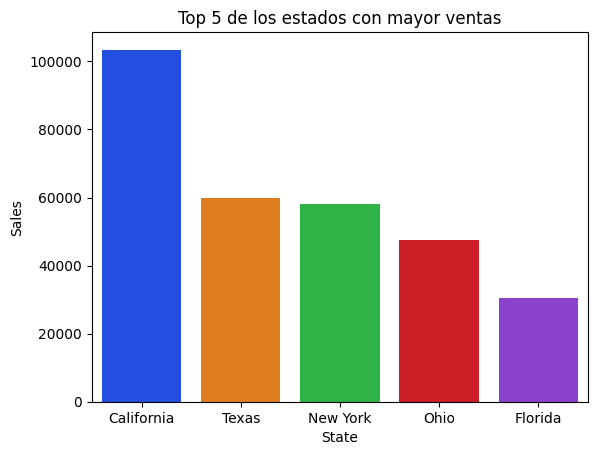

In [11]:
sns.barplot(data=top_5_ventas_por_estado, x='State', y='Sales', palette= 'bright')
plt.title('Top 5 de los estados con mayor ventas')
#Se visualiza los 5 estados con mayor ventas, teniendo a la cabeza al estado de California con un total de ventas por encima del 40% de diferencia a los demas estados.

In [12]:
ventas_categorias = df2.groupby([ 'Sub-Category', 'State'])['Sales'].sum().sort_values(ascending=False).reset_index()
ventas_categorias.head() # Se adiciona la Categoria para poder realizar el filtro

,Sub-Category,State,Sales
0,Chairs,California,41218.316391
1,Tables,California,31633.280000
2,Chairs,New York,31042.103697
3,Chairs,Texas,25808.115153
4,Chairs,Ohio,22147.761943


In [13]:
top_sales_by_category_state = ventas_categorias.groupby('Sub-Category').apply(lambda x: x.nlargest(3, 'Sales')).reset_index(drop=True)
top_sales_by_category_state # Obtenemos los 3 estados con las mayores ventas por categoria.

,Sub-Category,State,Sales
0,Bookcases,California,20224.432500
1,Bookcases,New York,11101.432000
2,Bookcases,Texas,10744.891400
3,Chairs,California,41218.316391
4,Chairs,New York,31042.103697
5,Chairs,Texas,25808.115153
6,Furnishings,California,10343.030000
7,Furnishings,New York,5933.510000
8,Furnishings,Florida,5890.815435
9,Tables,California,31633.280000


Text(0.5, 1.0, 'Ventas por Categoría y Estado')

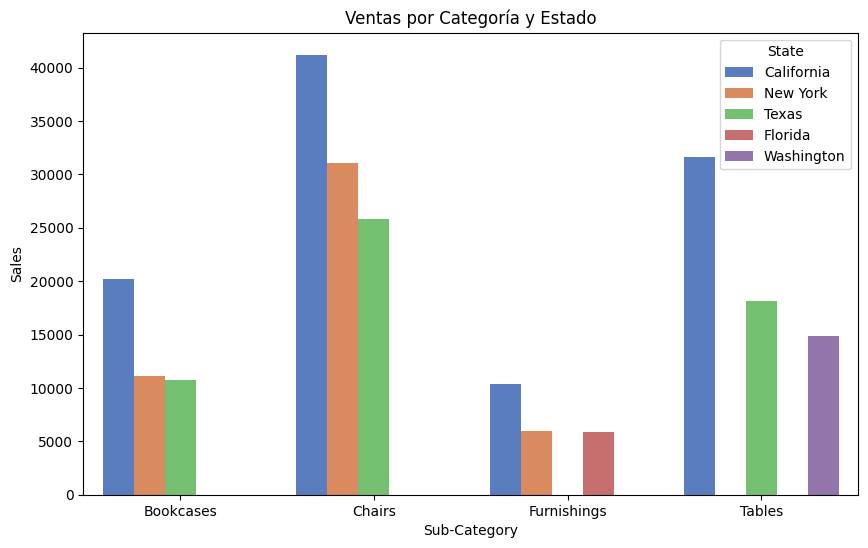

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_sales_by_category_state, x='Sub-Category', y='Sales', hue='State', palette='muted')
plt.title('Ventas por Categoría y Estado')
#Podemos visualizar un analisis Bivariado entre las columnas de Categoría y Estado en cuanto a las ventas.

##Top Cliente que me compran con mayor frecuencia por segmento.

In [15]:
top_clientes=df2.groupby('Segment')['Customer ID'].value_counts().sort_values(ascending=False).reset_index(name='count')
top_clientes

,Segment,Customer ID,count
0,Consumer,SV-20365,10
1,Consumer,JE-15745,9
2,Consumer,LC-16885,8
3,Home Office,PP-18955,8
4,Consumer,SC-20095,7
...,...,...,...
634,Consumer,SG-20605,1
635,Consumer,SF-20065,1
636,Consumer,SC-20845,1
637,Consumer,SC-20575,1


In [16]:
top_clientes_frecuentes = top_clientes.groupby('Segment').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)
top_clientes_frecuentes #Observamos el top de los 3 clientes que nos compran frecuentemente por segmentos.

,Segment,Customer ID,count
0,Consumer,SV-20365,10
1,Consumer,JE-15745,9
2,Consumer,LC-16885,8
3,Corporate,JD-16150,7
4,Corporate,SM-20950,6
5,Corporate,NS-18640,6
6,Home Office,PP-18955,8
7,Home Office,MP-18175,6
8,Home Office,Dp-13240,6


## INSIGHTS
## Análisis sobre los descuentos otorgados a los clientes

In [34]:
df_rentabilidad=df2
df_rentabilidad['Rentabilidad']= df_rentabilidad['Discount'].apply(lambda x: 'Rentable' if x < 0.21 else 'No Rentable')
df_rentabilidad.head()

,Row ID,Order ID,Customer ID,Ship Mode,Order Date,Ship Date,period,Season,year,month,...,Segment,Sub-Category,Product ID,Product Name,Discount,Sales,Quantity,unit_value,Profit,Rentabilidad
0,4,US-2015-108966,SO-20335,Standard Class,2015-10-11,2015-10-18,811 days,Fall,2015,10,...,Consumer,Tables,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,0.45,957.5775,5,191.5155,-383.0310,No Rentable
1,11,CA-2014-115812,BH-11710,Standard Class,2014-06-09,2014-06-14,1300 days,Summer,2014,6,...,Consumer,Tables,FUR-TA-10001539,Chromcraft Rectangular Conference Tables,0.20,1706.1840,9,189.5760,85.3092,Rentable
2,25,CA-2015-106320,EB-13870,Standard Class,2015-09-25,2015-09-30,827 days,Fall,2015,9,...,Consumer,Tables,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,0.00,1044.6300,3,348.2100,240.2649,Rentable
3,28,US-2015-150630,TB-21520,Standard Class,2015-09-17,2015-09-21,835 days,Fall,2015,9,...,Consumer,Bookcases,FUR-BO-10004834,"Riverside Palais Royal Lawyers Bookcase, Royal...",0.50,3083.4300,7,440.4900,-1665.0522,No Rentable
4,30,US-2015-150630,TB-21520,Standard Class,2015-09-17,2015-09-21,835 days,Fall,2015,9,...,Consumer,Furnishings,FUR-FU-10004848,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",0.20,124.2000,3,41.4000,15.5250,Rentable


In [55]:
df_discount=df2.groupby('Discount')['Profit'].sum().reset_index()
df_discount

,Discount,Profit
0,0.00,39198.5090
1,0.10,5398.9131
2,0.15,1294.6564
3,0.20,4616.1139
4,0.30,-7329.2854
5,0.32,-1275.1667
6,0.40,-14690.7324
7,0.45,-1958.7577
8,0.50,-11087.4524
9,0.60,-2604.6969


Text(0.5, 1.0, 'Análisis de Rentabilidad')

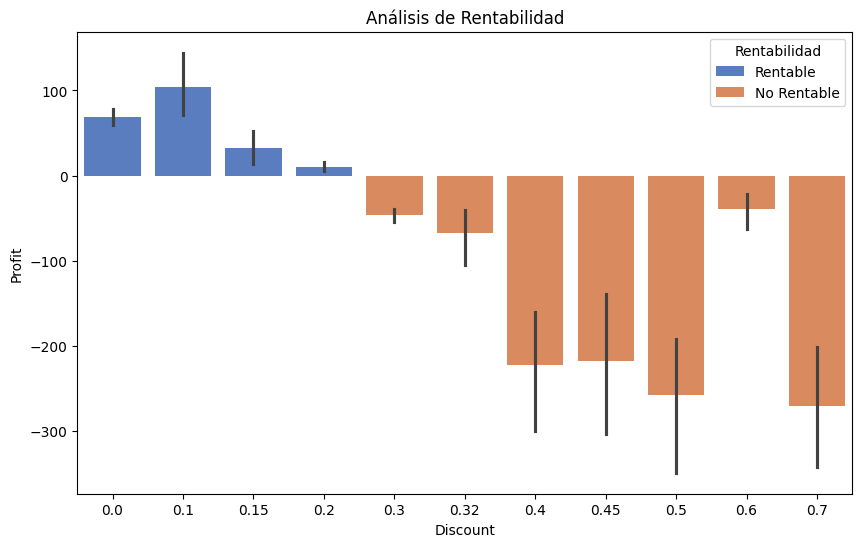

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_rentabilidad, x='Discount', y='Profit', hue='Rentabilidad', palette='muted')
plt.title('Análisis de Rentabilidad')
#Podemos observar que los descuentos mayores al 20% que son otorgados al cliente, nos causa una pérdida.

<ipython-input-49-66298457b946>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_discount, x='Discount', y='Profit',palette='muted')


<Axes: xlabel='Discount', ylabel='Profit'>

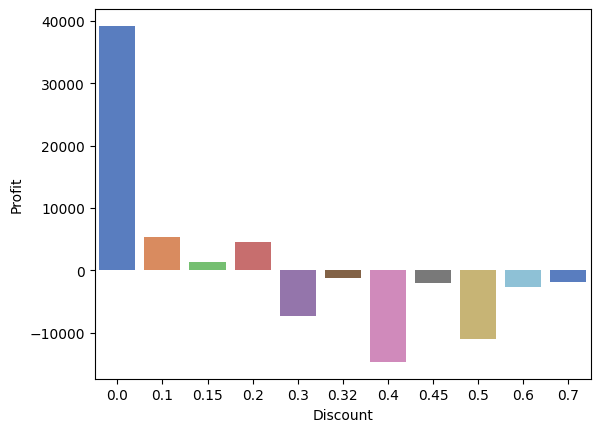

In [49]:
sns.barplot(data=df_discount, x='Discount', y='Profit',palette='muted')

In [57]:
total_sales= df2.Sales.sum()
total_sales

550311.4922710663

In [60]:
total_profit= df2.Profit.sum()
total_profit

9664.2195

#Análisis:
###Del total de las ventas por  550,311, el profit obtenido es de 9,664 equivalente al 1% de ganancias sobre sus ventas.
##Conclusión:
## No se está realizando una correcta aplicación de descuentos al momento de realizar una venta.
#Recomendacíon:
### Aplicar los descuentos en base al costo y la rentabilidad que se desea obtener por producto vendido.